# Pràctica 2
## Pandas : Estadistica


### Pregunta 1 : Importació del Dataset

Referencia: https://washdata.org/data/household#!/table?geo0=region&geo1=sdg



In [21]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# Q1 - Llegim el CSV.
csv_file_path = './washdash-download.csv'
df_data: pd.DataFrame = pd.read_csv(csv_file_path, sep=",")
display(df_data)
df_data.dtypes

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,sdg,Australia and New Zealand,total,Sanitation,2000,39.91334,9.120369e+06,Basic service
1,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Limited service
2,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Open defecation
3,sdg,Australia and New Zealand,total,Sanitation,2000,60.07930,1.372838e+07,Safely managed service
4,sdg,Australia and New Zealand,total,Sanitation,2000,0.00735,1.679801e+03,Unimproved
...,...,...,...,...,...,...,...,...
4880,sdg,Sub-Saharan Africa,rural,Drinking water,2020,10.89240,6.964458e+07,Surface water
4881,sdg,Sub-Saharan Africa,urban,Drinking water,2020,1.15059,5.234944e+06,Surface water
4882,sdg,Sub-Saharan Africa,total,Drinking water,2020,15.62694,1.710158e+08,Unimproved
4883,sdg,Sub-Saharan Africa,rural,Drinking water,2020,23.21050,1.484049e+08,Unimproved


Type               object
Region             object
Residence Type     object
Service Type       object
Year                int64
Coverage          float64
Population        float64
Service level      object
dtype: object

### Renombrem columnes 


In [22]:
df_data.replace(' ', '_', regex=True)
df_data = df_data.rename(columns = {'Residence Type':'Residence_Type', 'Service Type':'Service_Type','Service level':'Service_level'})
display(df_data)

df_data.dropna(inplace=True)


mask_Aus_NewZeal = (df_data.loc[ : , "Region"] == 'Australia and New Zealand')
df_data.loc[mask_Aus_NewZeal,['Region']] = 'aus_nz'
 
mask_cen_south_asia = (df_data.loc[ : , "Region"] == 'Central and Southern Asia')
df_data.loc[mask_cen_south_asia,['Region']] = 'cs_asia'
 
 
mask_ese_asia = (df_data.loc[ : , "Region"] == 'Eastern and South-Eastern Asia')
df_data.loc[mask_ese_asia,['Region']] = 'ese_asia'
 
 
mask_europe_na = (df_data.loc[ : , "Region"] == 'Europe and Northern America')
df_data.loc[mask_europe_na,['Region']] = 'eu_na'




,Type,Region,Residence_Type,Service_Type,Year,Coverage,Population,Service_level
0,sdg,Australia and New Zealand,total,Sanitation,2000,39.91334,9.120369e+06,Basic service
1,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Limited service
2,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Open defecation
3,sdg,Australia and New Zealand,total,Sanitation,2000,60.07930,1.372838e+07,Safely managed service
4,sdg,Australia and New Zealand,total,Sanitation,2000,0.00735,1.679801e+03,Unimproved
...,...,...,...,...,...,...,...,...
4880,sdg,Sub-Saharan Africa,rural,Drinking water,2020,10.89240,6.964458e+07,Surface water
4881,sdg,Sub-Saharan Africa,urban,Drinking water,2020,1.15059,5.234944e+06,Surface water
4882,sdg,Sub-Saharan Africa,total,Drinking water,2020,15.62694,1.710158e+08,Unimproved
4883,sdg,Sub-Saharan Africa,rural,Drinking water,2020,23.21050,1.484049e+08,Unimproved


### Pregunta 1 - !!!!!

-  Mostra un grafic que indica el numero de població per Regio on no tinguin serveis per rentar-se les mans.





,Year,Coverage,Population
Region,,,
Northern Africa and Western Asia,2020.0,2.862935,9.705360e+06
Oceania,2020.0,39.358930,4.250221e+06
Sub-Saharan Africa,2020.0,33.095850,2.462661e+08
cs_asia,2020.0,3.153410,4.479776e+07


<AxesSubplot:xlabel='Region'>

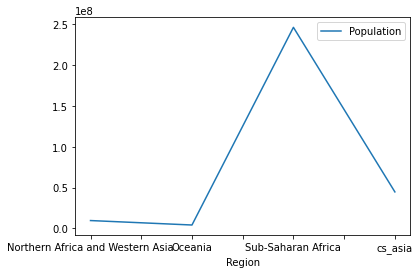

In [66]:
df_q1 = df_data.query('(Year >= 2020) and (Service_level == "No handwashing facility")')
df_q1 = df_q1.groupby(by='Region').mean()
display(df_q1)

display(df_q1.plot.barhç(x='',y='Population'))


<AxesSubplot:xlabel='Coverage', ylabel='Population'>

,Type,Region,Residence_Type,Service_Type,Year,Coverage,Population,Service_level
361,sdg,aus_nz,total,Sanitation,2020,0.00000,0.000000e+00,Limited service
1068,sdg,cs_asia,total,Sanitation,2020,12.25403,2.468830e+08,Limited service
1069,sdg,cs_asia,rural,Sanitation,2020,9.41371,1.193144e+08,Limited service
1070,sdg,cs_asia,urban,Sanitation,2020,17.07162,1.275686e+08,Limited service
1658,sdg,ese_asia,total,Sanitation,2020,3.41578,8.015838e+07,Limited service
1659,sdg,ese_asia,rural,Sanitation,2020,4.05571,3.752029e+07,Limited service
1660,sdg,ese_asia,urban,Sanitation,2020,2.99933,4.263809e+07,Limited service
2266,sdg,eu_na,total,Sanitation,2020,0.59294,6.620253e+06,Limited service
2267,sdg,eu_na,rural,Sanitation,2020,0.70791,1.784647e+06,Limited service
2268,sdg,eu_na,urban,Sanitation,2020,0.55941,4.835605e+06,Limited service


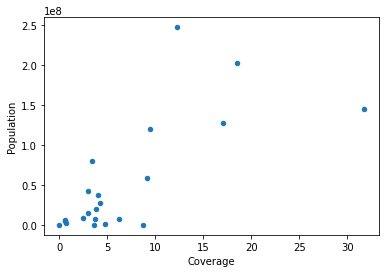

In [55]:
df_q2 = df_data.query('(Year == 2020) and (Service_level == "Limited service") and (Service_Type == "Sanitation")')

display(df_q2.plot.scatter(x='Coverage',y='Population'))
display(df_q2)


### Pregunta 3 - 
- Volem veure un grafic que mostri la quantitat de població amb un servei d'aigua sense millora al 2020

Year                                                       \
               count    mean  std     min     25%     50%     75%     max   
Residence_Type                                                              
rural           15.0  2020.0  0.0  2020.0  2020.0  2020.0  2020.0  2020.0   
total           16.0  2020.0  0.0  2020.0  2020.0  2020.0  2020.0  2020.0   
urban           15.0  2020.0  0.0  2020.0  2020.0  2020.0  2020.0  2020.0   

               Coverage             ...                      Population  \
                  count       mean  ...        75%       max      count   
Residence_Type                      ...                                   
rural              15.0  13.794517  ...  18.601635  54.13594       15.0   
total              16.0   8.907314  ...   8.242432  45.59422       16.0   
urban              15.0   3.879465  ...   3.354855  16.97767       15.0   

                                                                      \
                        mean           std         min           25%   
Residence_Type                                                         
rural           5.067423e+07  7.169216e+07     0.00000  5.177196e+06   
total           6.148451e+07  8.876668e+07  2257.04737  5.439589e+06   
urban           1.490284e+07  1.936124e+07  7696.97322  1.384955e+06   

                                                          
                         50%           75%           max  
Residence_Type                                            
rural           1.872175e+07  6.937436e+07  2.616298e+08  
total           2.545464e+07  9.212974e+07  3.370054e+08  
urban           7.311143e+06  2.233543e+07  7.537560e+07  

[3 rows x 24 columns]

<AxesSubplot:ylabel='Residence_Type'>

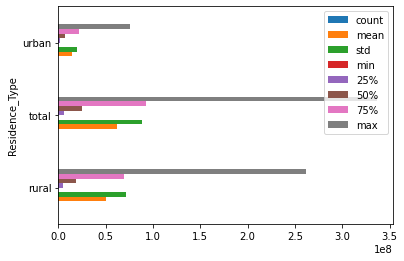

In [86]:
df_q3 = df_data.query('(Year == 2020) and (Service_level == "Unimproved") and (Residence_Type != "Total")')
df_q3 = df_q3.groupby(by='Residence_Type').describe()
display(df_q3)

display(df_q3.plot.barh( y='Population'))

## Pregunta 4 - Consulta que filtri resultats.



1. Que mostri només algunes de les columnes del dataframe.
2. Que filtri algunes de les files per un o més criteris.


## Pregunta 5. Consulta que crei un rànquing.

1.   És a dir, que ordeni els valors d’una columna i mostri els primers per pantalla.

2.   També heu de mostrar un gràfic.

3.   Resultat final, Jupyter Notebook o projecte Python amb el codi i el gràfic.


Volem mostra per codi postal, el courses avaiable dels ultims 5 dies.


3. Resultat final, Jupyter Notebook o projecte Python amb el codi

 ## Pregunta 7



Conclusió Pregunta 8:
Com podem veure al gràfic, a meitat del més d'Octubre, concretament el 13 i 14 d'octubre és quan n'hi ha més cursos disponibles a la ciutat de New York.

Pregunta 9



In [ ]:

from datetime import timedelta
from operator import index
df_q9: pd.DataFrame = copy.deepcopy(df_data_copy)

# seleccionem els últims 5 dies
data_max: int = df_q9['Last Report Date'].max()

print(dia_ult_5dies)
mounth_number = 6

comparator_date = data_max.strftime(f"%Y-{mounth_number}-%d %H:%M:%S")

df_q9_mask_greater6 = df_q9['Last Report Date'] >= comparator_date
df_q9_mask_less6 = df_q9['Last Report Date'] < comparator_date

df_q9_1 = df_q9.loc[df_q9_mask_less6,['Provider Name', 'Order Label', 'Courses Available','Last Report Date','State Code']]
df_q9_2 = df_q9.loc[df_q9_mask_greater6,['Provider Name', 'State Code', 'Order Label', 'Courses Available','Last Report Date']]

#df_q9_merge = df_q9_1.merge( df_q9_2er by= 'State Code', all=True)
df_q9_merge = pd.merge(df_q9_1, df_q9_2, on=['State Code','Provider Name','Order Label','Courses Available','Last Report Date'], how='outer', indicator=True)

display(df_q9_merge)




NameError: name 'df_data_copy' is not defined